# Steam Reviews Dataset EDA

## 1. Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure visualization settings
plt.style.use('ggplot')
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

# Display settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
file_path = "../../data/raw/dataset.csv"

df = pd.read_csv(file_path)

df.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


## 2. Initial Data Exploration

In [4]:
# Check the shape of the dataset
print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Display column information
print("\nColumn Names:")
print(df.columns.tolist())

# Display data types and memory usage
print("\nData Types and Memory Usage:")
df.info()

Dataset shape: 6417106 rows and 5 columns

Column Names:
['app_id', 'app_name', 'review_text', 'review_score', 'review_votes']

Data Types and Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


In [5]:
# Basic statistics for object columns
print("Descriptive Statistics for Text Columns:")
df.describe(include=['object']).T

Descriptive Statistics for Text Columns:


,count,unique,top,freq
app_name,6233872,9363,PAYDAY 2,88973
review_text,6409801,4473473,Early Access Review,1013351


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Missing Values Analysis:")
missing_df[missing_df['Missing Values'] > 0]  # Only show columns with missing values

Missing Values Analysis:


,Missing Values,Percentage
app_name,183234,2.86
review_text,7305,0.11


In [7]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count} ({(duplicate_count/len(df))*100:.2f}% of the dataset)")

dupes = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())

Number of duplicate rows: 1796102 (27.99% of the dataset)


In [8]:
if duplicate_count > 0:
    print("\nExample of duplicate entries:")
    print(dupes.head(20))
    
    print("\nUnique values:")  
    counts = dupes["review_text"].value_counts()
    print(counts[counts > 100])


Example of duplicate entries:
       app_id        app_name review_text  review_score  review_votes
5891       10  Counter-Strike                         1             0
8373       10  Counter-Strike                         1             0
4626       10  Counter-Strike                         1             0
4631       10  Counter-Strike                         1             0
5231       10  Counter-Strike                         1             0
3969       10  Counter-Strike           .             1             0
10876      10  Counter-Strike           .             1             0
11128      10  Counter-Strike           .             1             0
11201      10  Counter-Strike           .             1             0
12324      10  Counter-Strike           .             1             0
12335      10  Counter-Strike           .             1             0
3979       10  Counter-Strike        ....             1             0
11335      10  Counter-Strike        ....             1    

## 3. Game Analysis

In [9]:
# Count of reviews by game
game_counts = df['app_name'].value_counts().reset_index()
game_counts.columns = ['app_name', 'review_count']

# Display the top games by review count
print("Top 15 Games by Review Count:")
game_counts.head(15)

Top 15 Games by Review Count:


,app_name,review_count
0,PAYDAY 2,88973
1,DayZ,88850
2,Terraria,84828
3,Rust,77037
4,Dota 2,73541
5,Rocket League,54227
6,Undertale,51918
7,Left 4 Dead 2,50980
8,Warframe,48229
9,Grand Theft Auto V,42374


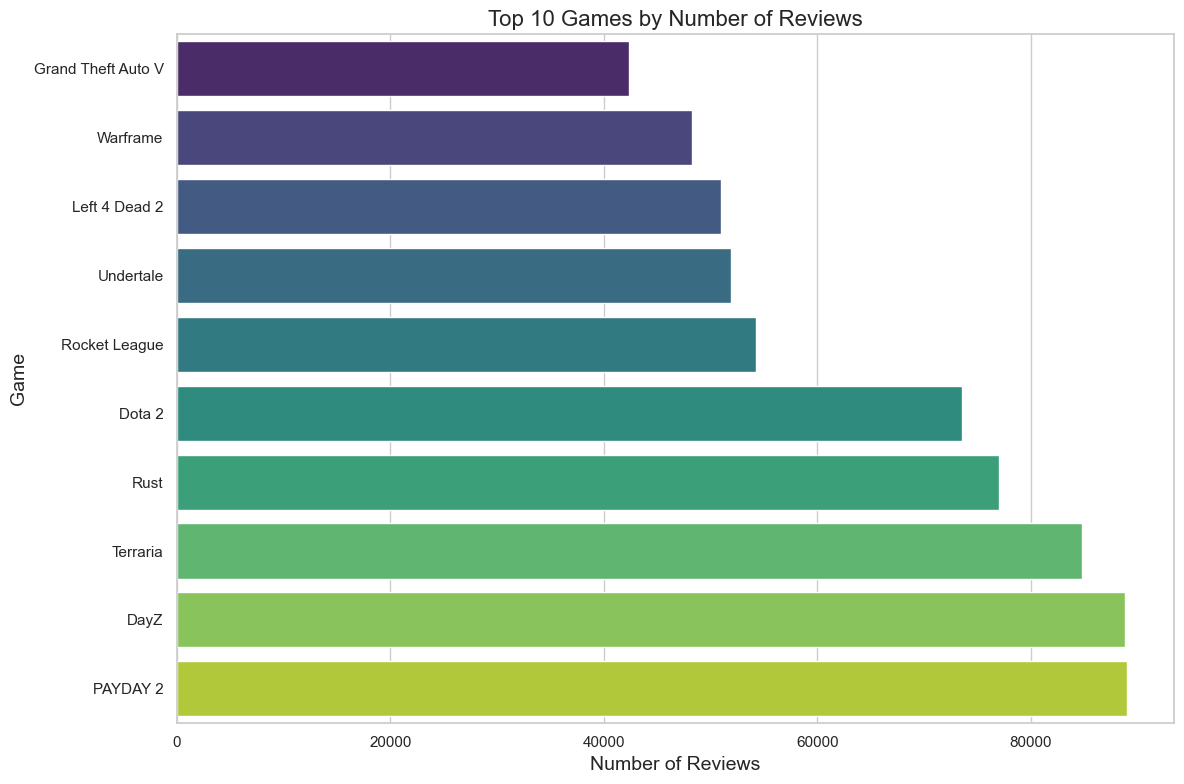

In [10]:
# Visualize top games by review count
plt.figure(figsize=(12, 8))
top_games = game_counts.head(10).sort_values('review_count')

sns.barplot(data=top_games, y='app_name', x='review_count', palette='viridis')
plt.title('Top 10 Games by Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
# Calculate average review score by game
game_avg_scores = df.groupby('app_name')['review_score'].agg(['mean', 'count']).reset_index()
game_avg_scores = game_avg_scores.rename(columns={'mean': 'avg_score', 'count': 'review_count'})
game_avg_scores = game_avg_scores.sort_values(by=['avg_score','review_count'], ascending=[False, False])

# Filter to games with a minimum number of reviews for statistical significance
min_reviews = 10
top_rated_games = game_avg_scores[game_avg_scores['review_count'] >= min_reviews].head(15)
print(f"Top 15 Highest-Rated Games (with at least {min_reviews} reviews):")
top_rated_games

Top 15 Highest-Rated Games (with at least 10 reviews):


,app_name,avg_score,review_count
7330,"Star Wars: Battlefront 2 (Classic, 2005)",1.00,2976
842,Batman: Arkham City GOTY,1.00,868
3379,Golf With Your Friends,1.00,520
3850,Hyperdimension Neptunia Re;Birth3 V Generation,1.00,241
8011,The Lab,1.00,224
2207,Deus Ex: Game of the Year Edition,1.00,187
2745,Everyday Genius: SquareLogic,1.00,180
5617,Paint it Back,1.00,157
9115,Wuppo - Definitive Edition,1.00,135
4190,Keep Talking and Nobody Explodes,1.00,118


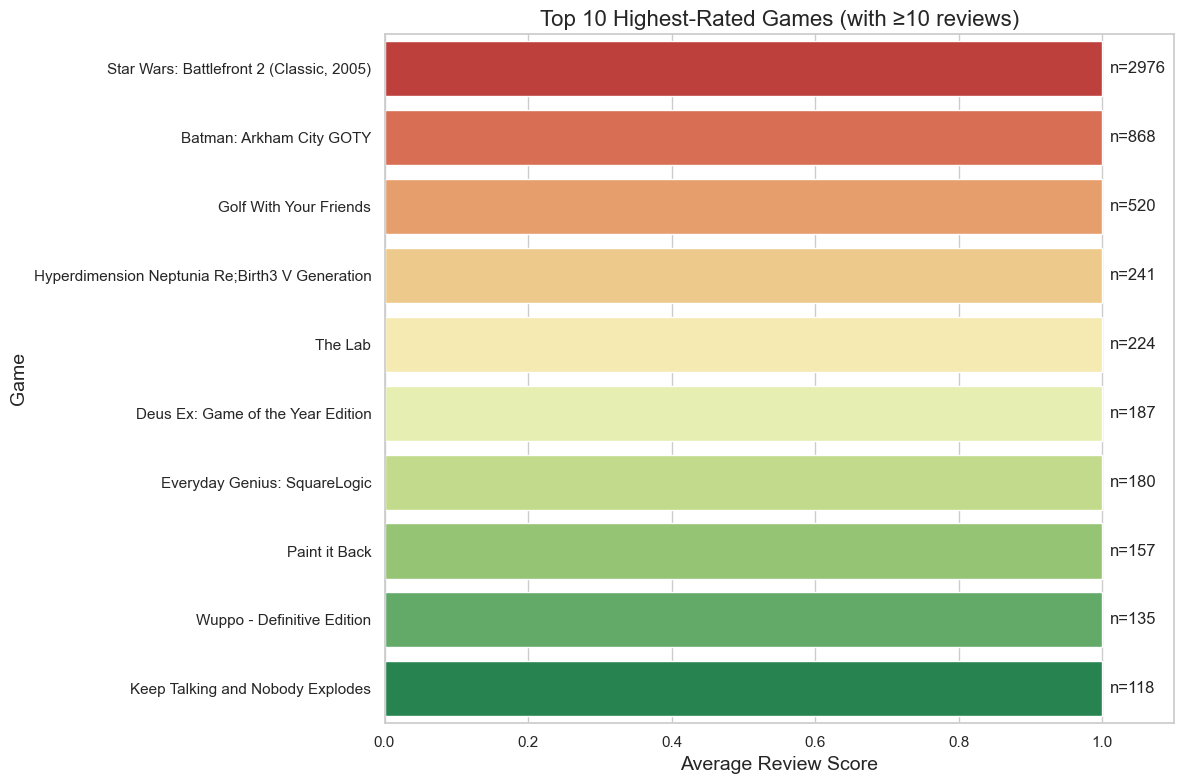

In [12]:
# Visualize top-rated games (with a minimum number of reviews)
plt.figure(figsize=(12, 8))
top_10_rated = top_rated_games.head(10)

colors = sns.color_palette("RdYlGn", 10)
ax = sns.barplot(data=top_10_rated, y='app_name', x='avg_score', palette=colors)

# Add review count as text
for i, (score, count) in enumerate(zip(top_10_rated['avg_score'], top_10_rated['review_count'])):
    ax.text(score + 0.01, i, f"n={count}", va='center')

plt.title(f'Top 10 Highest-Rated Games (with ≥{min_reviews} reviews)', fontsize=16)
plt.xlabel('Average Review Score', fontsize=14)
plt.ylabel('Game', fontsize=14)
plt.xlim(0, 1.1)  # Assuming scores are between 0 and 1
plt.tight_layout()
plt.show()

In [13]:
# Lowest rated games
lowest_rated_games = game_avg_scores[game_avg_scores['review_count'] >= min_reviews].tail(15).sort_values(by=['avg_score','review_count'],ascending=[True, False])
print(f"15 Lowest-Rated Games (with at least {min_reviews} reviews):")
lowest_rated_games

15 Lowest-Rated Games (with at least 10 reviews):


,app_name,avg_score,review_count
6192,Random Access Murder,-1.00,60
1193,Brine,-1.00,20
7708,Tales of Destruction,-1.00,14
6203,Raycatcher,-1.00,12
270,Adam and Eve: The Game - Chapter 1,-1.00,10
3098,Fray,-0.94,34
2442,Drunk Wizards,-0.93,28
2483,Dungeon of Gain,-0.91,23
6239,Recovery Search and Rescue Simulation,-0.91,22
4907,Metal Planet,-0.90,21


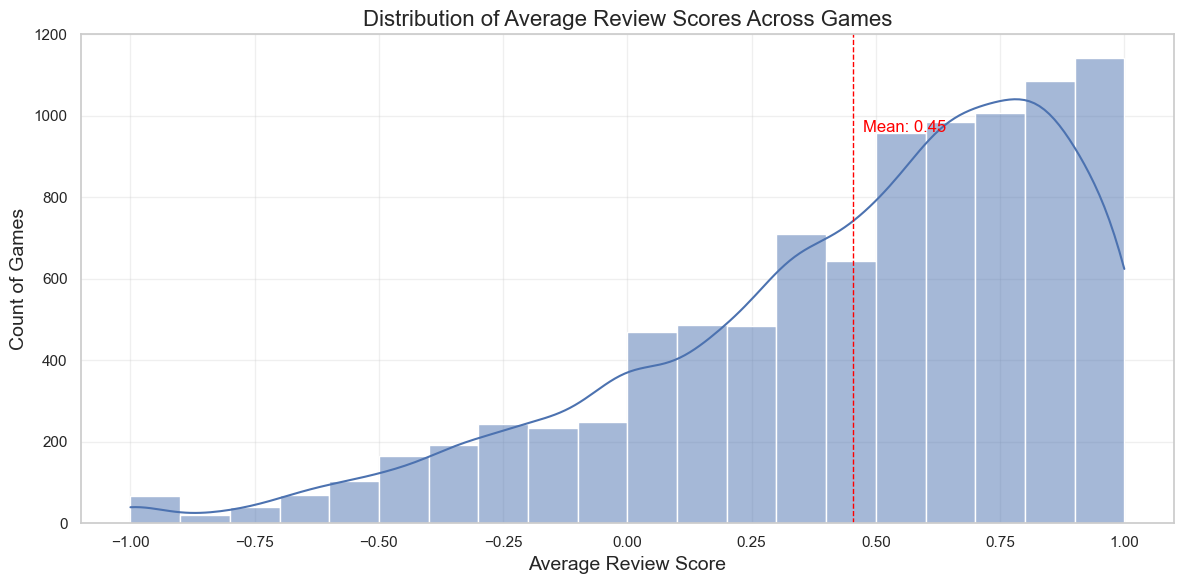

In [14]:
# Distribution of average review scores across all games
plt.figure(figsize=(12, 6))
sns.histplot(game_avg_scores['avg_score'], bins=20, kde=True)
plt.axvline(game_avg_scores['avg_score'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(game_avg_scores['avg_score'].mean() + 0.02, plt.gca().get_ylim()[1] * 0.8, 
         f'Mean: {game_avg_scores["avg_score"].mean():.2f}', color='red')

plt.title('Distribution of Average Review Scores Across Games', fontsize=16)
plt.xlabel('Average Review Score', fontsize=14)
plt.ylabel('Count of Games', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Review Score Analysis

In [15]:
# Distribution of review scores
score_counts = df['review_score'].value_counts().sort_index().reset_index()
score_counts.columns = ['review_score', 'count']
score_counts['percentage'] = (score_counts['count'] / len(df)) * 100

print("Distribution of Review Scores:")
score_counts

Distribution of Review Scores:


,review_score,count,percentage
0,-1,1156686,18.03
1,1,5260420,81.97


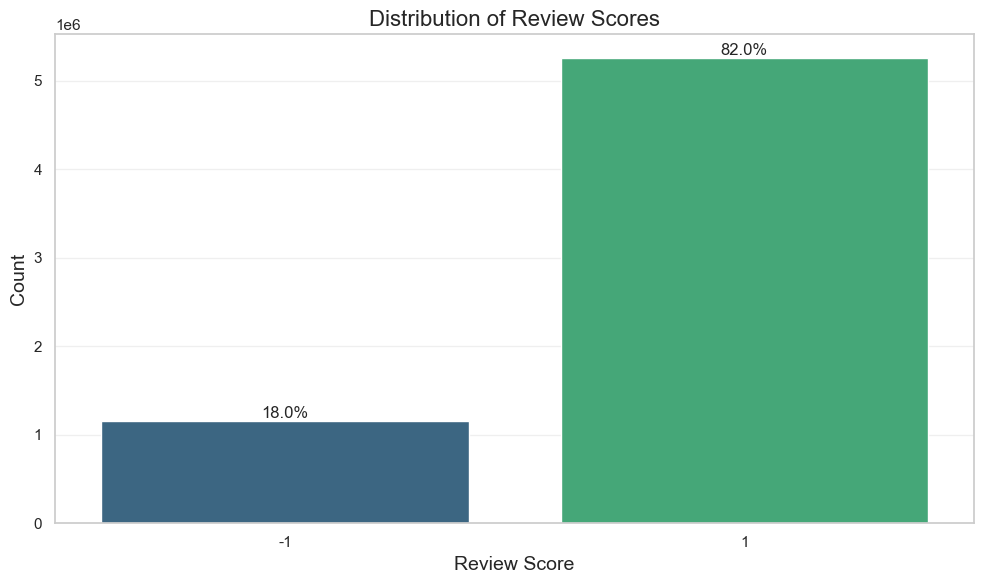

In [16]:
# Visualize the distribution of review scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=score_counts, x='review_score', y='count', palette='viridis')

# Add percentage labels on top of bars
for i, row in score_counts.iterrows():
    ax.text(i, row['count'], f"{row['percentage']:.1f}%", ha='center', va='bottom')

plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 5. Review Votes Analysis

In [17]:
# Distribution of review votes
print("Distribution of Review Votes:")
vote_stats = df['review_votes'].describe()
vote_stats

Distribution of Review Votes:


count   6417106.00
mean          0.15
std           0.35
min           0.00
25%           0.00
50%           0.00
75%           0.00
max           1.00
Name: review_votes, dtype: float64

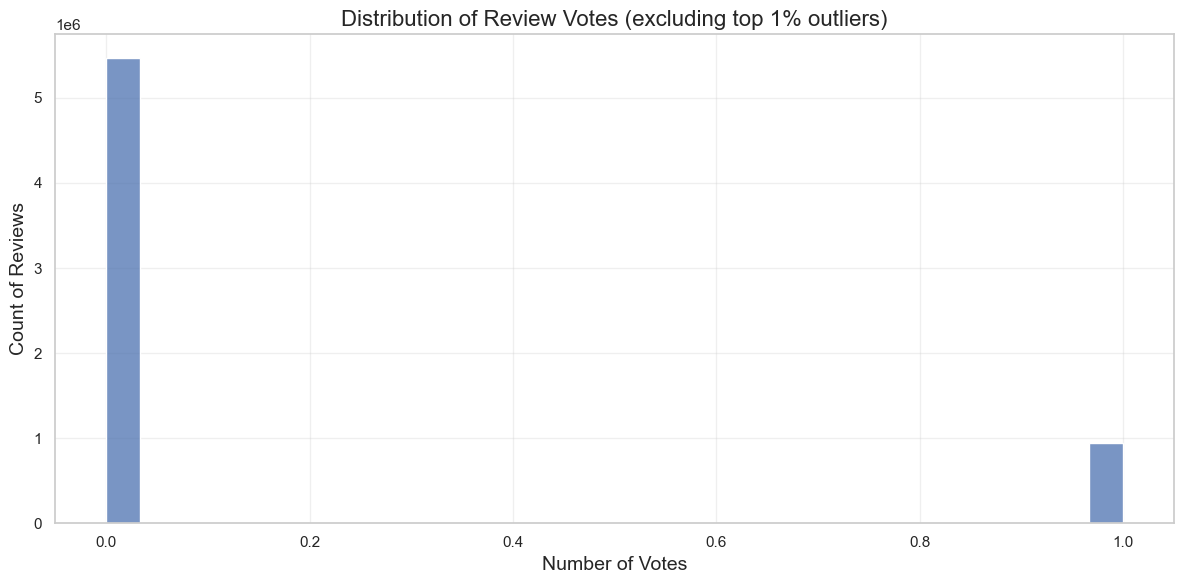

In [18]:
# Create bins for review votes to better visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['review_votes'], bins=30, kde=False)
plt.title(f'Distribution of Review Votes (excluding top 1% outliers)', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# Relationship between review score and votes
vote_by_score = df.groupby('review_score')['review_votes'].agg(['mean', 'median', 'count']).reset_index()
print("Average and Median Votes by Review Score:")
vote_by_score

Average and Median Votes by Review Score:


,review_score,mean,median,count
0,-1,0.24,0.00,1156686
1,1,0.13,0.00,5260420


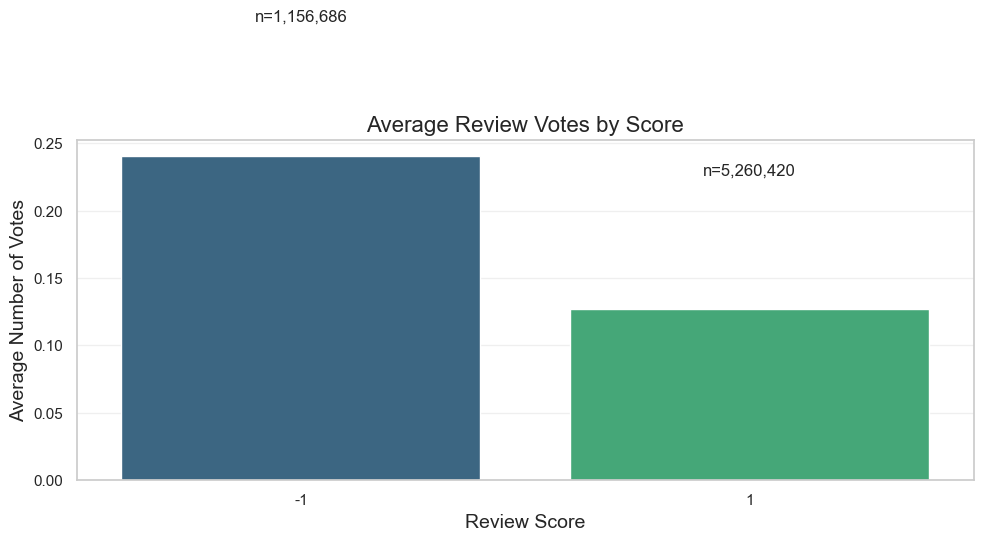

In [20]:
# Visualize relationship between review score and votes
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vote_by_score, x='review_score', y='mean', palette='viridis')

# Add review count as text
for i, count in enumerate(vote_by_score['count']):
    ax.text(i, vote_by_score['mean'].iloc[i] + 0.1, f"n={count:,}", ha='center')

plt.title('Average Review Votes by Score', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Average Number of Votes', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [21]:
# Reviews with most votes
top_voted_reviews = df.groupby('app_name').agg(
    avg_vote=('review_votes', 'mean'),
    count_vote=('review_votes', 'count'),
    avg_score=('review_score', 'mean'),
).reset_index()
top_voted_reviews = top_voted_reviews.rename(columns={"mean":"avg_vote","count":"count_vote"}).sort_values(by=['avg_vote',"count_vote"],ascending=[False, False])
top_10_voted = top_voted_reviews.head(10)

print("Top 10 Most Voted Reviews:")
print(top_10_voted)

Top 10 Most Voted Reviews:
                                          app_name  avg_vote  count_vote  \
8037                           The Legions of Rome      1.00          15   
4485  Line Of Defense Tactics - Tactical Advantage      1.00          14   
7075                                    Snow Light      1.00          11   
4010                          Interstellar Marines      1.00          10   
5081                               Motorcycle Club      1.00          10   
7603                                   Survivalist      1.00          10   
3642                                Helena The 3rd      1.00           9   
4308                        Kung Fury: Street Rage      1.00           9   
1281                            CRAPPY ZOMBIE GAME      1.00           7   
3312                                  Ghostbusters      1.00           7   

      avg_score  
8037      -0.47  
4485      -0.57  
7075      -0.64  
4010      -0.20  
5081      -0.60  
7603       0.80  
3642      

## 6. Review Text Analysis

In [22]:
# Add column for review text length
df['review_length'] = df['review_text'].apply(lambda x: len(str(x)))
df['review_word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# Basic statistics on review text length
print("Review Text Length Statistics:")
length_stats = df[['review_length', 'review_word_count']].describe().T
length_stats

Review Text Length Statistics:


,count,mean,std,min,25%,50%,75%,max
review_length,6417106.00,304.08,599.87,1.00,30.00,104.00,310.00,8873.00
review_word_count,6417106.00,55.38,108.02,0.00,6.00,19.00,57.00,4000.00


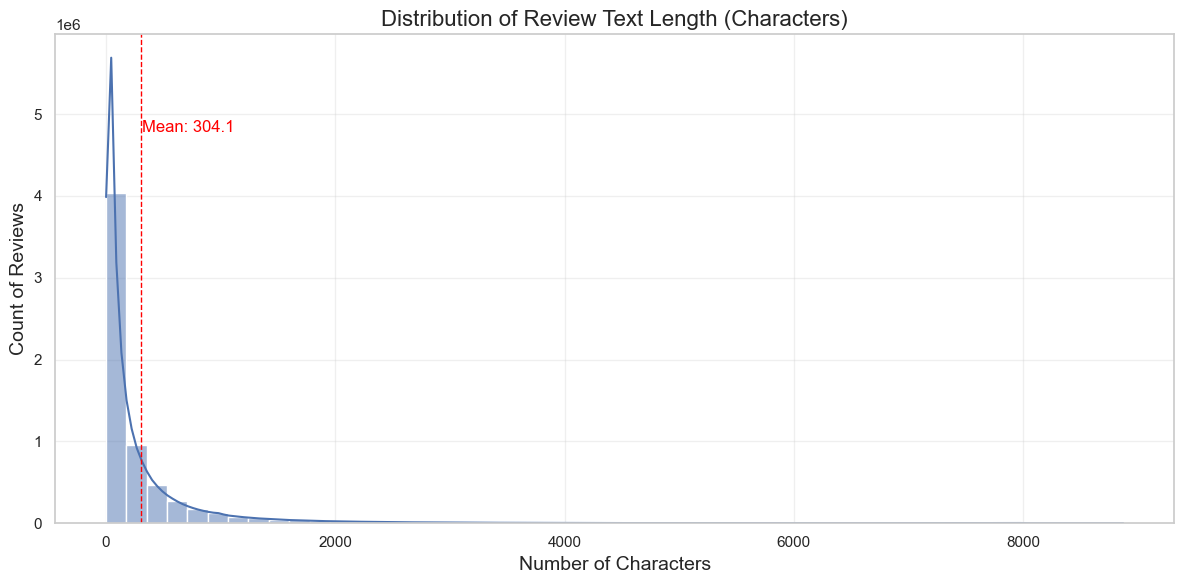

In [23]:
# Distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.axvline(df['review_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['review_length'].mean() + 10, plt.gca().get_ylim()[1] * 0.8, 
         f'Mean: {df["review_length"].mean():.1f}', color='red')

plt.title('Distribution of Review Text Length (Characters)', fontsize=16)
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

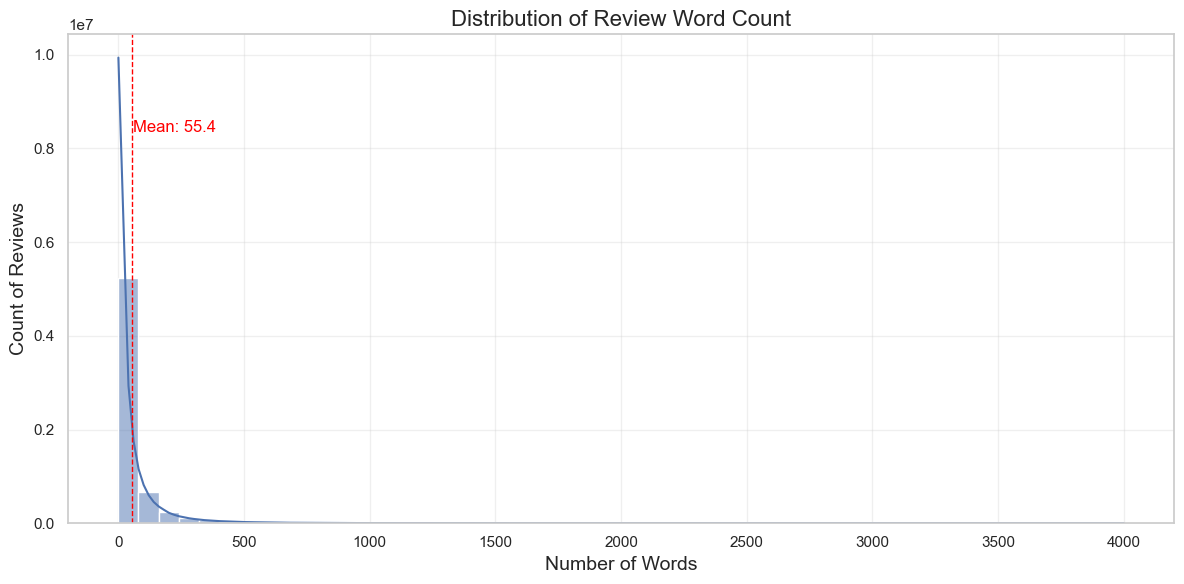

In [24]:
# Distribution of review word counts
plt.figure(figsize=(12, 6))
sns.histplot(df['review_word_count'], bins=50, kde=True)
plt.axvline(df['review_word_count'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(df['review_word_count'].mean() + 2, plt.gca().get_ylim()[1] * 0.8, 
         f'Mean: {df["review_word_count"].mean():.1f}', color='red')

plt.title('Distribution of Review Word Count', fontsize=16)
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Count of Reviews', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

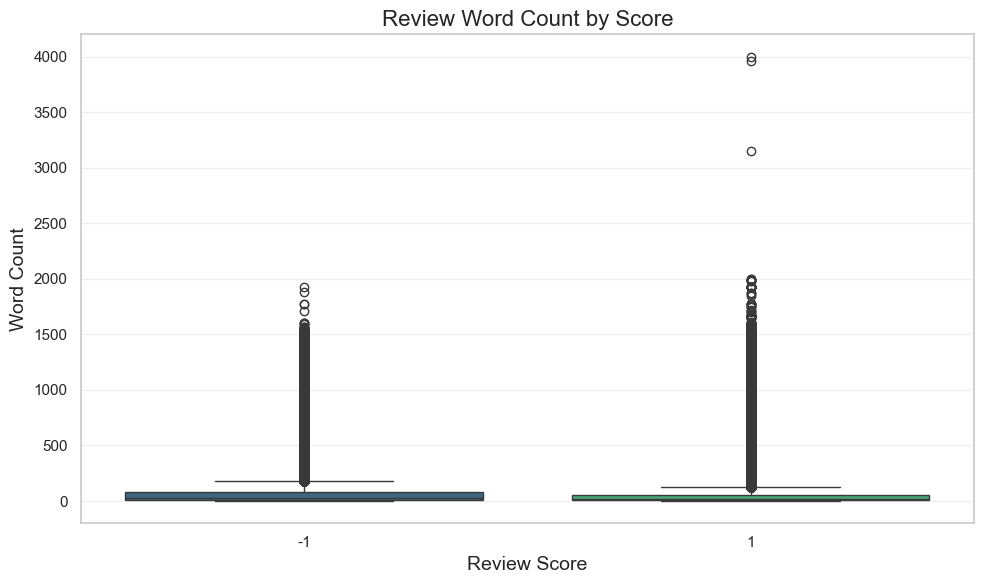

In [25]:
# Compare review length by score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='review_score', y='review_word_count', palette='viridis')
plt.title('Review Word Count by Score', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Word Count', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [26]:
import re

def count_unique_words(text):
    # lowercase
    text = text.lower()
    # tokenize (letters and numbers)
    words = re.findall(r"\b\w+\b", text)
    return len(set(words))

In [27]:
df["review_unique_word_count"] = df["review_text"].astype(str).apply(count_unique_words)
df["unique_ratio"] = df["review_unique_word_count"] / df["review_word_count"]

In [28]:
# Basic statistics on Review Unique Words and its ratio
print("Review Unique Word Count Statistics:")
length_stats = df[['review_unique_word_count', 'unique_ratio']].describe().T
length_stats

Review Unique Word Count Statistics:


,count,mean,std,min,25%,50%,75%,max
review_unique_word_count,6417106.00,37.47,54.34,0.00,6.00,18.00,46.00,1317.00
unique_ratio,6416920.00,0.89,0.22,0.00,0.78,0.93,1.00,43.00


## 7. Relationships between Variables

In [29]:
# Correlation between numeric variables
numeric_df = df[['review_score', 'review_votes', 'review_length', 'review_word_count']]
correlation = numeric_df.corr()

print("Correlation Between Numeric Variables:")
correlation

Correlation Between Numeric Variables:


,review_score,review_votes,review_length,review_word_count
review_score,1.00,-0.12,-0.06,-0.07
review_votes,-0.12,1.00,0.05,0.05
review_length,-0.06,0.05,1.00,0.99
review_word_count,-0.07,0.05,0.99,1.00


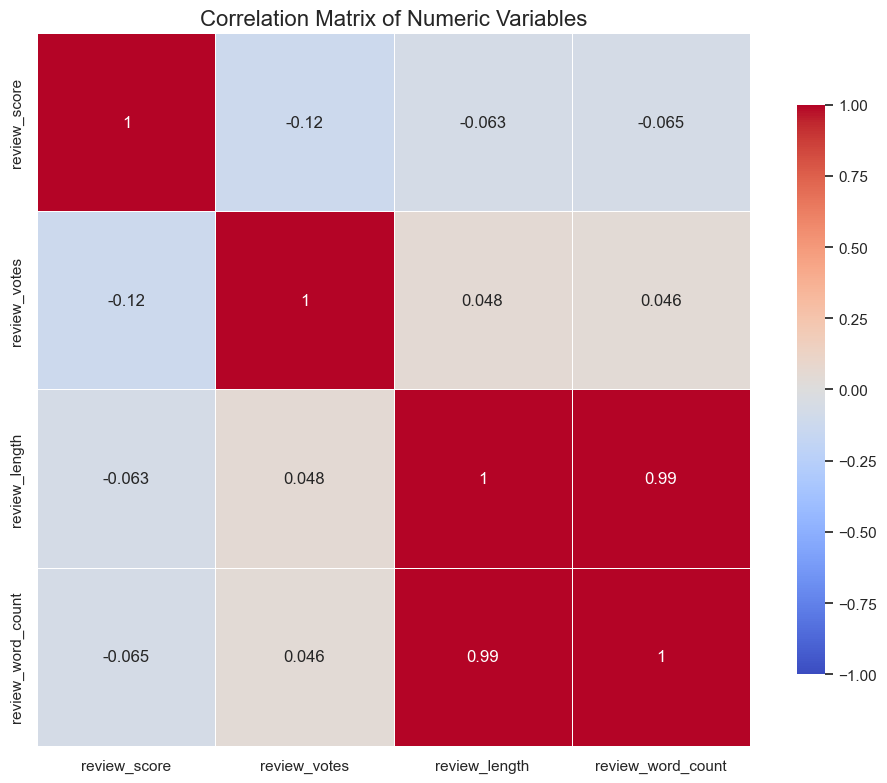

In [30]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()

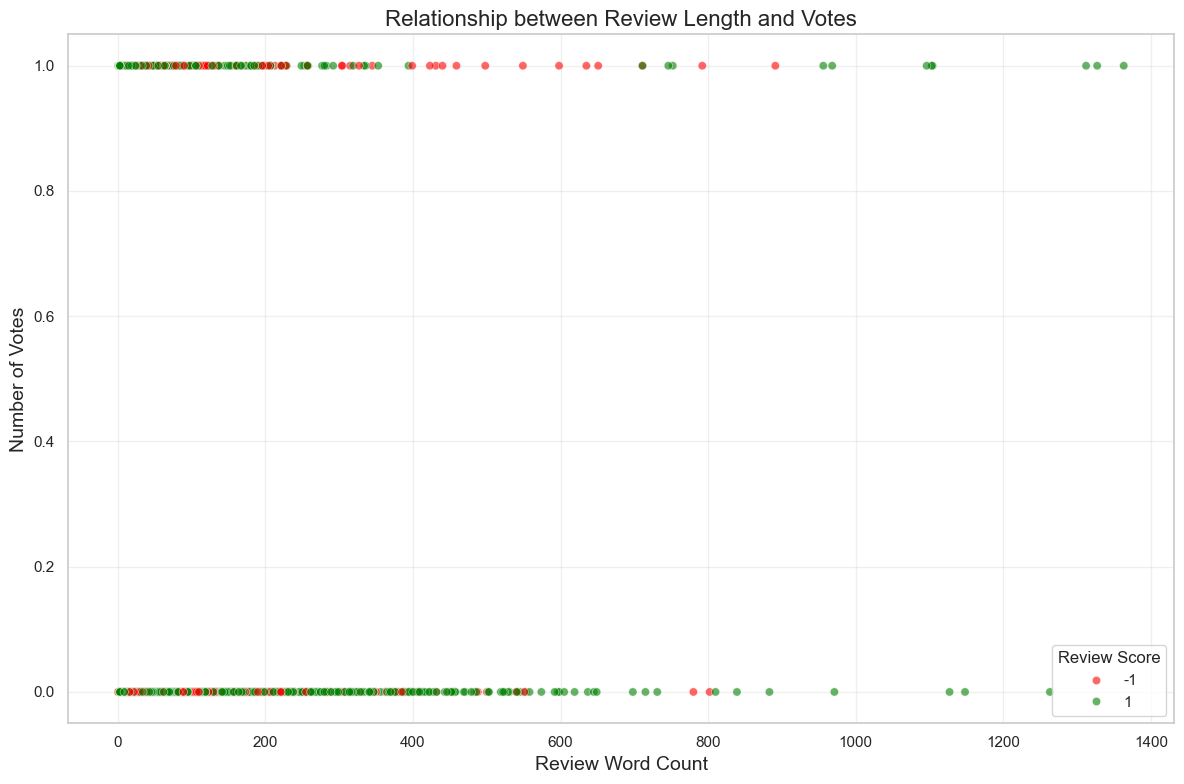

In [31]:
# Scatter plot of review length vs votes with score as color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df.sample(min(5000, len(df)), random_state=42), 
                x='review_word_count', y='review_votes', 
                hue='review_score', palette={-1: 'red', 0: 'gray', 1: 'green'}, alpha=0.6)
plt.title('Relationship between Review Length and Votes', fontsize=16)
plt.xlabel('Review Word Count', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)
plt.legend(title='Review Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()